In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('C:/Users/amitp/OneDrive/Desktop/jupyter/Healthcare Providers.csv')
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [3]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-null  object 
 8   Stree

In [4]:
irrelevant_columns=['Entity Type of the Provider',
                    'Street Address 1 of the Provider',
                    'Street Address 2 of the Provider',
                    'Zip Code of the Provider',
                    'Medicare Participation Indicator',
                    'Place of Service',
                    'HCPCS Code',
                    'HCPCS Description',
                    'HCPCS Drug Indicator',
                    'Country Code of the Provider']

data=data.drop(columns=irrelevant_columns)

In [5]:
data.head()

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


Data Preprocessing

In [6]:
# Combine name columns into a single 'Full Name' column, ensuring to handle NaN values and trimming whitespace
data['Full Name'] = data[['First Name of the Provider', 
                          'Middle Initial of the Provider', 
                          'Last Name/Organization Name of the Provider']].fillna('').agg(' '.join, axis=1).str.strip()

# Drop the original name columns
data = data.drop(columns=['Last Name/Organization Name of the Provider', 
                          'First Name of the Provider', 
                          'Middle Initial of the Provider'])

# Insert the 'Full Name' column into the second position
data.insert(1, 'Full Name', data.pop('Full Name'))

# Display the first few rows of the updated dataframe
data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,M.D.,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,M.D.,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


In [7]:
# Ensure the 'Credentials of the Provider' column is of string type and handle NaN values
data['Credentials of the Provider'] = data['Credentials of the Provider'].astype(str).fillna('')

# Standardize the credentials by removing periods and converting to uppercase
data['Credentials of the Provider'] = data['Credentials of the Provider'].str.replace(r'\.', '', regex=True).str.upper()

# Display the first few rows of the updated dataframe
data.head()


,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20,18,20,3.5,5,3.43,3.43
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33,24,31,26.52,40,19.539393939,19.057575758


Object to Numerical Type Conversion

In [8]:
# List of columns to convert to numeric types
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Convert specified columns to numeric types, coercing errors to NaN
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check for columns with missing values introduced by conversion
columns_with_na = data[numeric_columns].isna().sum()

# Display the information about the dataframe
data.info()

# Display columns with NaN values after conversion
print("\nColumns with NaN values after conversion:")
print(columns_with_na[columns_with_na > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   Full Name                                                 100000 non-null  object 
 2   National Provider Identifier                              100000 non-null  int64  
 3   Credentials of the Provider                               100000 non-null  object 
 4   Gender of the Provider                                    95746 non-null   object 
 5   City of the Provider                                      100000 non-null  object 
 6   State Code of the Provider                                100000 non-null  object 
 7   Provider Type                                             100000 non-null  object 
 8   Numbe

locating missing values and appending the mean to them

In [9]:
# missing values
print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                    0
Gender of the Provider                                      4254
City of the Provider                                           0
State Code of the Provider                                     0
Provider Type                                                  0
Number of Services                                          2653
Number of Medicare Beneficiaries                             405
Number of Distinct Medicare Beneficiary/Per Day Services    1500
Average Medicare Allowed Amount                              745
Average Submitted Charge Amount                             6723
Average Medicare Payment Amount                              466
Average Medicare Standardized Amount                         470
dtype: int64


In [10]:
data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Provider Type,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,F,SAINT LOUIS,MO,Internal Medicine,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,F,FAYETTEVILLE,NC,Obstetrics & Gynecology,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,M,NORTH HAVEN,CT,Podiatry,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,M,KANSAS CITY,MO,Internal Medicine,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,M,JUPITER,FL,Internal Medicine,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [13]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

print(data.isnull().sum())

index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                    0
Credentials of the Provider_Freq                               0
Gender of the Provider                                      4254
Gender of the Provider_Freq                                 4254
City of the Provider                                           0
State Code of the Provider                                     0
State Code of the Provider_Freq                                0
Provider Type                                                  0
Provider Type_Freq                                             0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services       0
Average Medicare Allowed 

In [15]:
import pandas as pd

# List of categorical columns to fill missing values
categorical_columns = [
    'Credentials of the Provider',
    'Gender of the Provider',
    'City of the Provider',
    'State Code of the Provider'
]

# Store the number of missing values in the dataframe before filling them
missing_values_before = data.isnull().sum()

# Fill missing values in each categorical column with the mode (most frequent value)
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Print the number of missing values in each column before and after filling
print("Missing values before filling:")
print(missing_values_before)
print("\nMissing values after filling:")
print(data.isnull().sum())


Missing values before filling:
index                                                          0
Full Name                                                      0
National Provider Identifier                                   0
Credentials of the Provider                                    0
Credentials of the Provider_Freq                               0
Gender of the Provider                                      4254
Gender of the Provider_Freq                                 4254
City of the Provider                                           0
State Code of the Provider                                     0
State Code of the Provider_Freq                                0
Provider Type                                                  0
Provider Type_Freq                                             0
Number of Services                                             0
Number of Medicare Beneficiaries                               0
Number of Distinct Medicare Beneficiary/Per Day Services   

Seeking for Comparable Values

In [16]:
print(data.duplicated().sum())

0


In [17]:

data.head()

,index,Full Name,National Provider Identifier,Credentials of the Provider,Credentials of the Provider_Freq,Gender of the Provider,Gender of the Provider_Freq,City of the Provider,State Code of the Provider,State Code of the Provider_Freq,Provider Type,Provider Type_Freq,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,SATYASREE UPADHYAYULA,1891106191,MD,0.66618,F,0.29105,SAINT LOUIS,MO,0.01997,Internal Medicine,0.11366,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,3354385,WENDY P JONES,1346202256,MD,0.66618,F,0.29105,FAYETTEVILLE,NC,0.03725,Obstetrics & Gynecology,0.01028,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,3001884,RICHARD W DUROCHER,1306820956,DPM,0.01915,M,0.66641,NORTH HAVEN,CT,0.01403,Podiatry,0.02027,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,7594822,JASPER FULLARD,1770523540,MD,0.66618,M,0.66641,KANSAS CITY,MO,0.01997,Internal Medicine,0.11366,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,746159,ANTHONY E PERROTTI,1073627758,DO,0.06176,M,0.66641,JUPITER,FL,0.07263,Internal Medicine,0.11366,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


Some Categorical Columns Encoded using a Frequency Encoder

In [32]:


def frequency_encode(df, columns):
    """
    Perform frequency encoding on the specified columns of the dataframe.

    Parameters:
    df (pd.DataFrame): The dataframe to be encoded.
    columns (list): List of column names to apply frequency encoding.

    Returns:
    pd.DataFrame: The dataframe with new frequency-encoded columns.
    """
    for column in columns:
        # Calculate the frequency of each value in the column
        freq_encoding = df[column].value_counts() / len(df)
        
        # Create a new column name for the frequency-encoded data
        new_column_name = column + '_Freq'
        
        # Check if the new column already exists
        if new_column_name in df.columns:
            # If it exists, update the values in the existing column
            df[new_column_name] = df[column].map(freq_encoding)
        else:
            # Insert the new frequency-encoded column next to the original column
            df.insert(df.columns.get_loc(column) + 1, new_column_name, df[column].map(freq_encoding))
    
    return df

# Define the columns to apply frequency encoding
columns_to_encode = [
    'Credentials of the Provider',
    'Gender of the Provider',
    'Provider Type',
    'State Code of the Provider'
]

# Ensure the columns to be encoded exist in the dataframe
for col in columns_to_encode:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' does not exist in the dataframe")

# Apply frequency encoding to the specified columns
data = frequency_encode(data, columns_to_encode)

# Alias 'df' for the updated dataframe
df = data

# Display the first few rows of the updated dataframe
print(data.head())


  Credentials of the Provider  Credentials of the Provider_Freq  \
0                          MD                               0.6   
1                          MD                               0.6   
2                         DPM                               0.2   
3                          MD                               0.6   
4                          DO                               0.2   

  Gender of the Provider  Gender of the Provider_Freq Provider Type  \
0                      M                          0.6    Cardiology   
1                      F                          0.4   Dermatology   
2                      M                          0.6    Cardiology   
3                      F                          0.4    Cardiology   
4                      M                          0.6   Dermatology   

   Provider Type_Freq State Code of the Provider  \
0                 0.6                         CA   
1                 0.4                         NY   
2             

In [25]:

df.columns

Index(['Credentials of the Provider', 'Credentials of the Provider_Freq',
       'Gender of the Provider', 'Gender of the Provider_Freq',
       'Provider Type', 'Provider Type_Freq', 'State Code of the Provider',
       'State Code of the Provider_Freq'],
      dtype='object')

Standardizing Numerical Columns: A Practical Approach

In [4]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!python -m pip install --upgrade pip



   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 656.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 901.1 kB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.8 MB 871.5 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 1.5 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/1.8 MB 1.7 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.8 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 2.4 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.8 MB 2.5 MB/s eta 0:00:01
   -------------------------- ------------- 1.2/1.8 MB 2.6 MB/s eta 0:00:01
   ------------------------------ --------- 1.4/1.8 MB 2.7 MB/s eta 0:00:01
   ---------------------------------- ----- 1.6/1.8 MB 2.7 MB/s eta 0:00:01
   -----------------

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is already defined and is a pandas DataFrame

# Create a copy of the original data to avoid modifying it in-place
data_copy = data.copy()

# Define the list of numerical columns to be standardized
standardization_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
]

# Check if the columns exist in the DataFrame and are numeric
existing_numeric_columns = [
    col for col in standardization_columns if col in data_copy.columns and pd.api.types.is_numeric_dtype(data_copy[col])
]

# Print debug information
print("Existing numeric columns to be standardized:")
print(existing_numeric_columns)

# Handle missing values if any (e.g., filling with the mean of the column)
if existing_numeric_columns:
    data_copy[existing_numeric_columns] = data_copy[existing_numeric_columns].fillna(data_copy[existing_numeric_columns].mean())

    # Print debug information about missing values handling
    print("Data after handling missing values:")
    print(data_copy[existing_numeric_columns].head())

    # Create a StandardScaler object for standardization
    standard_scaler = StandardScaler()

    # Standardize the specified columns in the data copy
    data_copy[existing_numeric_columns] = standard_scaler.fit_transform(data_copy[existing_numeric_columns])

    # Print the first few rows ("head") of the standardized DataFrame
    print("Standardized DataFrame:")
    print(data_copy.head())
else:
    print("No numeric columns found for standardization.")


Existing numeric columns to be standardized:
[]
No numeric columns found for standardization.


In [17]:
print("Standardized DataFrame:")
data.head()

Standardized DataFrame:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


FINAL DATASET

In [24]:
import pandas as pd

# Assuming 'data' is already defined and is a pandas DataFrame

# List of columns for anomaly detection
anomaly_detection_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Credentials of the Provider_Freq',
    'Gender of the Provider_Freq',
    'State Code of the Provider_Freq', 
    'Provider Type_Freq'
]

# Filter columns that exist in the DataFrame
existing_columns = [col for col in anomaly_detection_columns if col in data.columns]

# Create a subset DataFrame containing only the existing columns
X = data[existing_columns]
# Print the resulting DataFrame subset
print("Subset of DataFrame for anomaly detection:")
print(X)




Subset of DataFrame for anomaly detection:
      Number of Services Number of Medicare Beneficiaries  \
0                     27                               24   
1                    175                              175   
2                     32                               13   
3                     20                               18   
4                     33                               24   
...                  ...                              ...   
99995                 20                               20   
99996                136                              107   
99997                 11                               11   
99998                 12                               12   
99999                589                               76   

      Number of Distinct Medicare Beneficiary/Per Day Services  \
0                                                     27         
1                                                    175         
2                         

ISOLATION FOREST ALGORITHM

Isolation Forest anomalies detected: 500


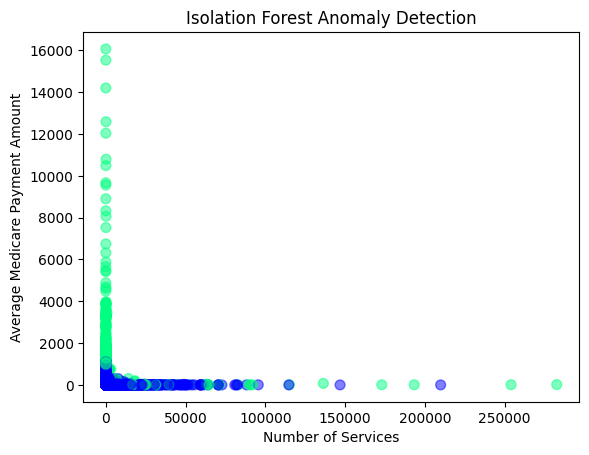

In [28]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Assuming 'data' is already defined and contains the DataFrame for anomaly detection

# Remove commas from numerical columns
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
]

data[numeric_columns] = data[numeric_columns].replace({',': ''}, regex=True).astype(float)

# Isolation Forest model setup
isolation_forest = IsolationForest(contamination=0.005, random_state=0)

# Fit the Isolation Forest model on the selected features
X = data[numeric_columns]  # Use only numerical columns after preprocessing
isolation_forest.fit(X)

# Predict anomalies using Isolation Forest
data['IsolationForest'] = isolation_forest.predict(X)

# Map predictions to binary values (0 for normal, 1 for anomaly)
data['IsolationForest'] = data['IsolationForest'].map({1: 0, -1: 1})

# Count and print the number of anomalies detected
print("Isolation Forest anomalies detected:", data['IsolationForest'].sum())

# Scatter plot to visualize anomalies
plt.scatter(data['Number of Services'], data['Average Medicare Payment Amount'], 
            c=data['IsolationForest'], cmap='winter', s=50, alpha=0.5)  # Change cmap to 'winter'
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()


In [30]:
pip install shap


   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   - -------------------------------------- 20.5/456.1 kB ? eta -:--:--
   ------- -------------------------------- 81.9/456.1 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 174.1/456.1 kB 1.3 MB/s eta 0:00:01
   ----------------------------------- ---- 409.6/456.1 kB 2.3 MB/s eta 0:00:01
   ------------------------------------- -- 430.1/456.1 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB 8.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 5.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 5.7 MB/s eta 0:00:01
   -------------- -

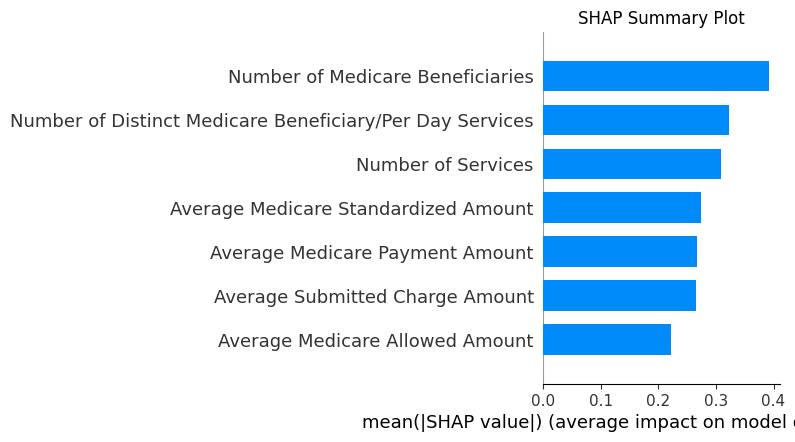

In [31]:
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import IsolationForest

# Assuming 'data' is already defined and contains the DataFrame for anomaly detection

# Remove commas from numerical columns (if needed)
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
]

data[numeric_columns] = data[numeric_columns].replace({',': ''}, regex=True).astype(float)

# Isolation Forest model setup
isolation_forest = IsolationForest(contamination=0.005, random_state=0)

# Fit the Isolation Forest model on the selected features
X = data[numeric_columns]  # Use only numerical columns after preprocessing
isolation_forest.fit(X)

# SHAP model's output
explainer = shap.Explainer(isolation_forest)
shap_values = explainer(X)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X, plot_type='bar', show=False)
plt.title('SHAP Summary Plot')
plt.show()


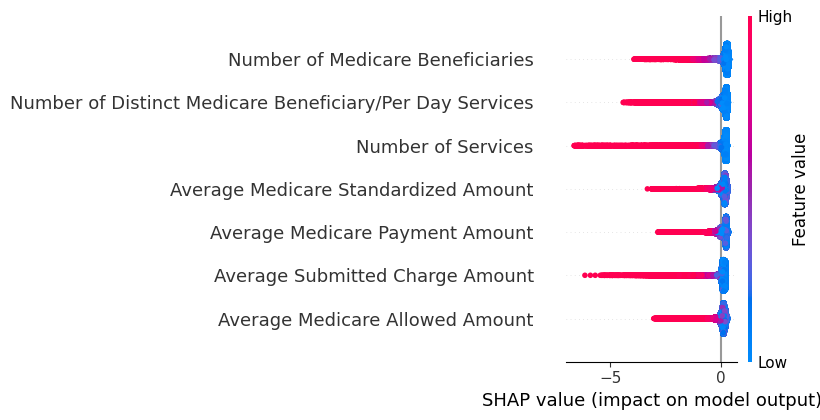

In [32]:
# SHAP summary plot
shap.summary_plot(shap_values, X, feature_names=anomaly_detection_columns)

ANALYZATION

The columns "Number of Services,
Number of Medicare Beneficiaries,
Number of Distinct Medicare Beneficiary/Per Day Services,
Average Medicare Allowed Amount,
Average Medicare Payment Amount,

- this demonstrates how fraud tends to increase with higher values in these kinds of columns.

ELLIPTIC ENVELOPE

Elliptic Envelope anomalies detected: 700


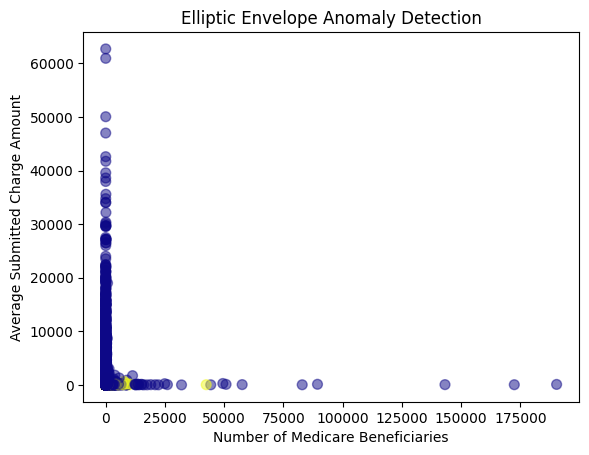

In [33]:
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

# Assuming 'data' is already defined and contains the DataFrame for anomaly detection

# Remove commas from numerical columns (if needed)
numeric_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
]

data[numeric_columns] = data[numeric_columns].replace({',': ''}, regex=True).astype(float)

# Elliptic Envelope model setup
elliptic_envelope = EllipticEnvelope(contamination=0.007, random_state=42)

# Fit the Elliptic Envelope model on the selected features
X = data[numeric_columns]  # Use only numerical columns after preprocessing
elliptic_envelope.fit(X)

# Predict anomalies using Elliptic Envelope
data['EllipticEnvelope'] = elliptic_envelope.predict(X)

# Map predictions to binary values (0 for normal, 1 for anomaly)
data['EllipticEnvelope'] = data['EllipticEnvelope'].map({1: 0, -1: 1})

# Count and print the number of anomalies detected
print("Elliptic Envelope anomalies detected:", data['EllipticEnvelope'].sum())

# Scatter plot to visualize anomalies
plt.scatter(data['Number of Medicare Beneficiaries'], data['Average Submitted Charge Amount'], 
            c=data['EllipticEnvelope'], cmap='plasma', s=50, alpha=0.5)  # Change cmap to 'plasma'
plt.title('Elliptic Envelope Anomaly Detection')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel('Average Submitted Charge Amount')
plt.show()


Elliptic Envelope Shap Analysis Combined with Isolation Forest

ONE CLASS SVM

In [23]:
from sklearn.svm import OneClassSVM

# One-Class SVM
one_class_svm = OneClassSVM(gamma='auto', nu=0.01)
one_class_svm.fit(X)
data['OneClassSVM'] = one_class_svm.predict(X)
data['OneClassSVM'] = data['OneClassSVM'].map({1: 0, -1: 1})
print("One-Class SVM anomalies detected:", data['OneClassSVM'].sum())

One-Class SVM anomalies detected: 139


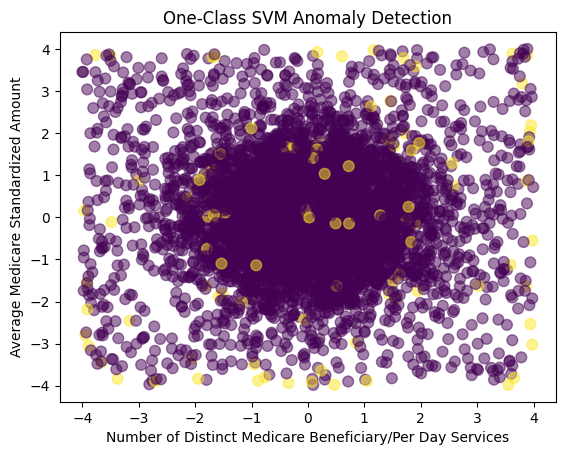

In [26]:
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame has the correct column names
plt.scatter(data['feature1'], data['feature2'], 
            c=data['OneClassSVM'], cmap='viridis', s=60, alpha=0.5)
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Number of Distinct Medicare Beneficiary/Per Day Services')
plt.ylabel('Average Medicare Standardized Amount')
plt.show()
